In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [139]:
rcParams['font.family'] = 'SimHei'
rcParams['axes.unicode_minus'] = False  # 关闭unicode负号，改用ASCII负号

In [140]:
df = pd.read_csv(r"D:\pythonSpace\pythonProject\resource\wps\house_sales.csv")

In [141]:
# 删除无效列
df.drop(columns='origin_url',inplace=True)
# 缺失值处理
df.dropna(inplace=True)
# 删除重复数据
df.drop_duplicates(inplace=True)
# 数据类型转换
df['area'] = df['area'].str.replace('㎡','').astype(float)
df['price'] = df['price'].str.replace('万','').astype(float)
df['toward'] = df['toward'].astype('category')
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)
df['year'] = df['year'].str.replace('年建','').astype(np.int16)
# 异常值处理
df = df.drop(df[(df['area'] <= 20) | (df['area'] >= 600)].index)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
low_price = Q1-1.5*IQR
high_price = Q3+1.5*IQR
df = df[(df['price'] > low_price) & (df['price'] < high_price)]

In [142]:
# 数据特征值构造
df['district'] = df['address'].str.split('-').str[0]
def floor_handle(floor):
    if '低' in floor:
        return '低层'
    elif '中' in floor:
        return '中层'
    elif '高' in floor:
        return '高层'
    else:
        return '未知'
df['floor_type'] = df['floor'].apply(floor_handle).astype('category')
df['municipality_type'] = df['city'].apply(lambda city: True if city in ['北京','上海','天津','重庆'] else False).astype('category')
df['bed_rooms'] = df['rooms'].str.split('室').str[0].astype(np.int8)
df['living_rooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(np.int8)
df['building_age'] = 2025 - df['year']
df['price_labels'] = pd.cut(df['price'],bins=4,labels=['低价','中价','中高价','高价'])

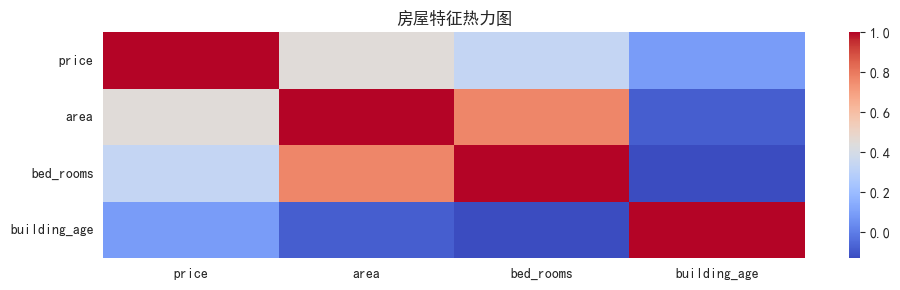

In [165]:
# 特征相关性
# 相关系数
# 皮尔逊相关系数：x、y、z对于a的影响
a = df[['price','area','bed_rooms','building_age']].corr()
a['price'].sort_values(ascending=False)[1:]
plt.figure(figsize=(10,3))
# 热力图
sns.heatmap(a,cmap='coolwarm')
plt.title('房屋特征热力图')
plt.tight_layout()

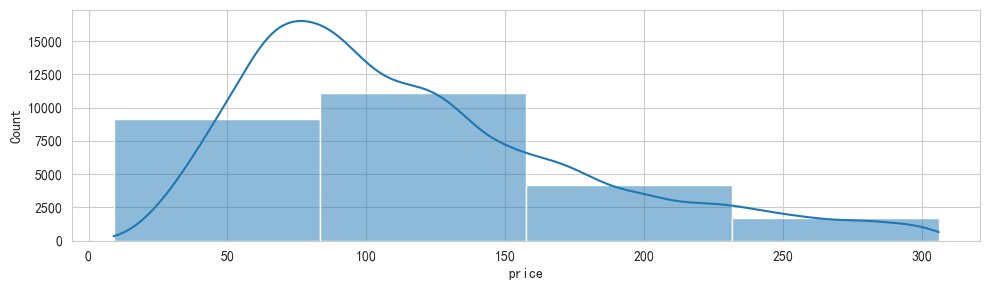

In [178]:
# 直方图上绘制核密度图
plt.figure(figsize=(10,3))
sns.histplot(data=df,x='price',bins=4,kde=True)
plt.tight_layout()

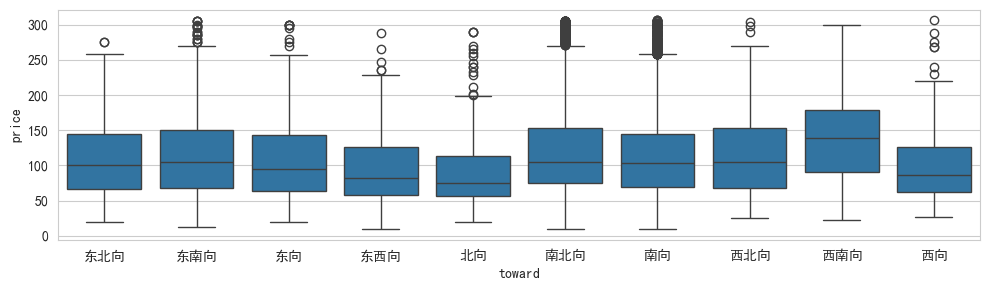

In [188]:
df.groupby('toward',observed=True).agg({
    'price':['mean','median'],
    'unit':['median'],
    'building_age':['median']
})
plt.figure(figsize=(10,3))
# 箱线图
sns.boxplot(data=df,x='toward',y='price',)
plt.tight_layout()

In [180]:
df.dtypes

city                   object
address                object
area                  float64
floor                  object
name                   object
price                 float64
province               object
rooms                  object
toward               category
unit                  float64
year                    int16
district               object
floor_type           category
municipality_type    category
bed_rooms                int8
living_rooms             int8
building_age            int16
price_labels         category
dtype: object